In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df1 = pd.read_csv(r"C:\Users\Z E Y T O N\Desktop\New folder\cleaned_data1.csv")

print(df1.shape)
print(df1.columns.tolist())
print(df1.isnull().sum())
df1.head()

(28022, 28)
['Quantity', 'Profit', 'Shipping_Cost', 'Discount', 'Order_Priority', 'mmonthN', 'Sales', 'Markets', 'Category_Office_Supplies', 'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art', 'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs', 'Sub-Category_Copiers', 'Sub-Category_Envelopes', 'Sub-Category_Fasteners', 'Sub-Category_Furnishings', 'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper', 'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_Supplies', 'Sub-Category_Tables', 'Segment_Corporate', 'Segment_Home_Office']
Quantity                    0
Profit                      0
Shipping_Cost               0
Discount                    0
Order_Priority              0
mmonthN                     0
Sales                       0
Markets                     0
Category_Office_Supplies    0
Category_Technology         0
Sub-Category_Appliances     0
Sub-Category_Art            0
Sub-Category_Binders        0
Sub-Category_

,Quantity,Profit,Shipping_Cost,Discount,Order_Priority,mmonthN,Sales,Markets,Category_Office_Supplies,Category_Technology,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Segment_Corporate,Segment_Home_Office
0,2,-5.063139,1.900614,0.7,3,10,4.426928,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,-4.499721,1.583094,0.7,3,10,4.374599,3,0,1,...,0,0,1,0,0,0,0,0,0,0
2,6,-5.452205,4.112185,0.7,1,10,5.419419,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.739062,0.095310,0.7,1,10,1.657847,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-3.416808,0.879627,0.7,1,12,2.871755,3,1,0,...,0,0,0,0,0,0,1,0,1,0


In [19]:
target_col = 'Profit'
X = df1.drop(columns=[target_col])
y = df1[target_col]
X.shape

(28022, 27)

# data split :

In [20]:
from sklearn.model_selection import train_test_split

# first split: train + temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# second split: validation + test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

Train: (19615, 27) Validation: (4203, 27) Test: (4204, 27)


# Standardize:

In [21]:
from sklearn.preprocessing import StandardScaler

# Numeric columns (manual list for clarity)
num_cols = ['Shipping_Cost', 'Discount', 'Sales']

# Standardize numeric columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [22]:
df1.head(20)

,Quantity,Profit,Shipping_Cost,Discount,Order_Priority,mmonthN,Sales,Markets,Category_Office_Supplies,Category_Technology,...,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Segment_Corporate,Segment_Home_Office
0,2,-5.063139,1.900614,0.7,3,10,4.426928,3,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6,-4.499721,1.583094,0.7,3,10,4.374599,3,0,1,...,0,0,1,0,0,0,0,0,0,0
2,6,-5.452205,4.112185,0.7,1,10,5.419419,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.739062,0.095310,0.7,1,10,1.657847,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,-3.416808,0.879627,0.7,1,12,2.871755,3,1,0,...,0,0,0,0,0,0,1,0,1,0
5,1,-2.262180,1.011601,0.7,1,12,2.075182,3,1,0,...,0,0,0,0,0,1,0,0,1,0
6,1,-4.331522,2.201659,0.7,0,11,3.772301,3,1,0,...,0,0,0,0,0,1,0,0,0,0
7,1,-1.786914,0.223144,0.7,3,12,1.425275,3,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,-1.587397,0.223144,0.7,3,12,1.488174,3,1,0,...,0,0,0,0,0,0,0,0,0,0
9,8,-4.425852,1.625311,0.7,3,12,4.359985,3,1,0,...,0,0,0,0,0,0,0,0,0,0


# LinearRegression:

In [27]:
from sklearn.linear_model import LinearRegression

# Create and train:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict:
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Evaluation:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Train :::: RMSE: {train_rmse:.4f},  R²: {train_r2:.4f}")
print(f"Valid :::: RMSE: {val_rmse:.4f},  R²: {val_r2:.4f}")

Train :::: RMSE: 1.9212,  R²: 0.5413
Valid :::: RMSE: 1.8831,  R²: 0.5439


# Ridge Regression:

In [30]:
from sklearn.linear_model import Ridge

alphas = [0.1, 1, 10, 50, 100]

for a in alphas:
    model = Ridge(alpha=a)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    print(f"Alpha={a:<5} :::: Train RMSE: {train_rmse:.4f}, R²: {train_r2:.4f} :::: Validation RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")

Alpha=0.1   :::: Train RMSE: 1.9212, R²: 0.5413 :::: Validation RMSE: 1.8831, R²: 0.5439
Alpha=1     :::: Train RMSE: 1.9212, R²: 0.5413 :::: Validation RMSE: 1.8831, R²: 0.5439
Alpha=10    :::: Train RMSE: 1.9212, R²: 0.5413 :::: Validation RMSE: 1.8831, R²: 0.5439
Alpha=50    :::: Train RMSE: 1.9215, R²: 0.5412 :::: Validation RMSE: 1.8833, R²: 0.5438
Alpha=100   :::: Train RMSE: 1.9222, R²: 0.5409 :::: Validation RMSE: 1.8839, R²: 0.5435


Changing α has almost no effect!

Regularization not impactful.

balanced bias–variance,no underfitting! no overfitting!

# Lasso Regression:

In [33]:
from sklearn.linear_model import Lasso

alphas = [0.001, 0.01, 0.1, 1.0]

for a in alphas:
    model = Lasso(alpha=a, max_iter=5000, random_state=42)
    model.fit(X_train, y_train)

    # Prediction:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Metrics:
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # feature selection effect:
    non_zero = np.sum(model.coef_ != 0)

    print(f"Alpha={a:<6} :::: Train RMSE: {train_rmse:.4f}, R²: {train_r2:.4f} :::: "
          f"Val RMSE: {val_rmse:.4f}, R²: {val_r2:.4f} :::: Non-zero feats: {non_zero}")

Alpha=0.001  :::: Train RMSE: 1.9213, R²: 0.5413 :::: Val RMSE: 1.8834, R²: 0.5438 :::: Non-zero feats: 24
Alpha=0.01   :::: Train RMSE: 1.9272, R²: 0.5385 :::: Val RMSE: 1.8905, R²: 0.5404 :::: Non-zero feats: 18
Alpha=0.1    :::: Train RMSE: 1.9628, R²: 0.5213 :::: Val RMSE: 1.9284, R²: 0.5217 :::: Non-zero feats: 5
Alpha=1.0    :::: Train RMSE: 2.2839, R²: 0.3518 :::: Val RMSE: 2.2468, R²: 0.3508 :::: Non-zero feats: 1


Increasing α drastically reduces active features (24 → 1).

Higher α causes higher error and lower R² → strong regularization leads to underfitting.

Small α (≈0.001) gives best trade-off: similar error to Linear Regression but with feature selection benefit.

# Decision Tree Regressor:

In [34]:
from sklearn.tree import DecisionTreeRegressor

depths = [3, 5, 7, 9, 12, 15]

for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    y_tr = model.predict(X_train)
    y_va = model.predict(X_val)

    tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
    va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
    tr_r2 = r2_score(y_train, y_tr)
    va_r2 = r2_score(y_val, y_va)

    print(f"max_depth={d:<2} :::: Train RMSE: {tr_rmse:.4f}, R²: {tr_r2:.4f} :::: "
          f"Val RMSE: {va_rmse:.4f}, R²: {va_r2:.4f}")

max_depth=3  :::: Train RMSE: 1.8367, R²: 0.5808 :::: Val RMSE: 1.8085, R²: 0.5794
max_depth=5  :::: Train RMSE: 1.6992, R²: 0.6412 :::: Val RMSE: 1.7024, R²: 0.6273
max_depth=7  :::: Train RMSE: 1.6270, R²: 0.6711 :::: Val RMSE: 1.6623, R²: 0.6446
max_depth=9  :::: Train RMSE: 1.5110, R²: 0.7163 :::: Val RMSE: 1.7041, R²: 0.6265
max_depth=12 :::: Train RMSE: 1.2842, R²: 0.7951 :::: Val RMSE: 1.8045, R²: 0.5812
max_depth=15 :::: Train RMSE: 0.9810, R²: 0.8804 :::: Val RMSE: 1.9596, R²: 0.5061


As max_depth increases, training accuracy rises but validation accuracy drops → overfitting.

Best trade-off at max_depth ≈7 (Valid R²≈0.64).

Deep trees (≥12) overfit, losing generalization!!

# Random Forest:

In [36]:
from sklearn.ensemble import RandomForestRegressor

n_list = [100, 200, 400]        # number of trees
depth_list = [5, 7, 9, None]

best = {"name": None, "val_r2": -np.inf, "model": None}

for n in n_list:
    for d in depth_list:
        # Build model:
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=d,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)

        # Predict:
        y_tr = rf.predict(X_train)
        y_va = rf.predict(X_val)

        # Metrics:
        tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
        va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
        tr_r2 = r2_score(y_train, y_tr)
        va_r2 = r2_score(y_val, y_va)

        name = f"n={n}, depth={d}"
        print(f"{name:18s} :::: Train RMSE: {tr_rmse:.4f}, R²: {tr_r2:.4f} :::: "
              f"Val RMSE: {va_rmse:.4f}, R²: {va_r2:.4f}")

        # Track best on validation :
        if va_r2 > best["val_r2"]:
            best = {"name": name, "val_r2": va_r2, "model": rf}

print("\nBest on validation:", best["name"], ":::: Val R²:", f"{best['val_r2']:.4f}")

# top-10 features:
imp = best["model"].feature_importances_
feat_imp = sorted(zip(X_train.columns, imp), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 feature importances:")
for f, v in feat_imp:
    print(f"{f:30s}  {v:.4f}")

n=100, depth=5     :::: Train RMSE: 1.6734, R²: 0.6520 :::: Val RMSE: 1.6588, R²: 0.6461
n=100, depth=7     :::: Train RMSE: 1.5870, R²: 0.6870 :::: Val RMSE: 1.6193, R²: 0.6628
n=100, depth=9     :::: Train RMSE: 1.4687, R²: 0.7320 :::: Val RMSE: 1.6010, R²: 0.6704
n=100, depth=None  :::: Train RMSE: 0.6321, R²: 0.9504 :::: Val RMSE: 1.6258, R²: 0.6601
n=200, depth=5     :::: Train RMSE: 1.6731, R²: 0.6522 :::: Val RMSE: 1.6586, R²: 0.6462
n=200, depth=7     :::: Train RMSE: 1.5864, R²: 0.6873 :::: Val RMSE: 1.6184, R²: 0.6631
n=200, depth=9     :::: Train RMSE: 1.4657, R²: 0.7331 :::: Val RMSE: 1.6000, R²: 0.6708
n=200, depth=None  :::: Train RMSE: 0.6232, R²: 0.9517 :::: Val RMSE: 1.6196, R²: 0.6626
n=400, depth=5     :::: Train RMSE: 1.6730, R²: 0.6522 :::: Val RMSE: 1.6594, R²: 0.6459
n=400, depth=7     :::: Train RMSE: 1.5855, R²: 0.6876 :::: Val RMSE: 1.6201, R²: 0.6624
n=400, depth=9     :::: Train RMSE: 1.4655, R²: 0.7331 :::: Val RMSE: 1.5994, R²: 0.6710
n=400, depth=None  ::

Increasing depth improves training fit while validation remains stable → well-regularized, low overfitting.

Best result at n=400, depth=9 with R²≈0.67.

most effects : Discount, Sales and Shipping_Cost.

More stable and accurate than single trees — ensemble averaging boosts generalization.

# Gradient Boosting:

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

n_list = [100, 200, 400]
depth_list = [3, 5, 7]
lr_list = [0.05, 0.1]

best = {"name": None, "val_r2": -np.inf, "model": None}

for n in n_list:
    for d in depth_list:
        for lr in lr_list:
            model = GradientBoostingRegressor(
                n_estimators=n,
                max_depth=d,
                learning_rate=lr,
                random_state=42
            )
            model.fit(X_train, y_train)

            y_tr = model.predict(X_train)
            y_va = model.predict(X_val)

            tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
            va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
            tr_r2 = r2_score(y_train, y_tr)
            va_r2 = r2_score(y_val, y_va)

            name = f"n={n}, depth={d}, lr={lr}"
            print(f"{name:25s} :::: Train R²: {tr_r2:.4f} :::: Val R²: {va_r2:.4f} :::: "
                  f"Train RMSE: {tr_rmse:.4f} :::: Val RMSE: {va_rmse:.4f}")

            # saving best model
            if va_r2 > best["val_r2"]:
                best = {"name": name, "val_r2": va_r2, "model": model}

print("\nBest on validation:", best["name"], ":::: Val R²:", f"{best['val_r2']:.4f}")

# Top 10 features:
imp = best["model"].feature_importances_
feat_imp = sorted(zip(X_train.columns, imp), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 feature importances:")
for f, v in feat_imp:
    print(f"{f:30s}  {v:.4f}")

n=100, depth=3, lr=0.05   :::: Train R²: 0.6583 :::: Val R²: 0.6546 :::: Train RMSE: 1.6584 :::: Val RMSE: 1.6389
n=100, depth=3, lr=0.1    :::: Train R²: 0.6722 :::: Val R²: 0.6656 :::: Train RMSE: 1.6241 :::: Val RMSE: 1.6125
n=100, depth=5, lr=0.05   :::: Train R²: 0.6974 :::: Val R²: 0.6726 :::: Train RMSE: 1.5605 :::: Val RMSE: 1.5954
n=100, depth=5, lr=0.1    :::: Train R²: 0.7215 :::: Val R²: 0.6758 :::: Train RMSE: 1.4969 :::: Val RMSE: 1.5877
n=100, depth=7, lr=0.05   :::: Train R²: 0.7598 :::: Val R²: 0.6779 :::: Train RMSE: 1.3903 :::: Val RMSE: 1.5824
n=100, depth=7, lr=0.1    :::: Train R²: 0.8034 :::: Val R²: 0.6703 :::: Train RMSE: 1.2578 :::: Val RMSE: 1.6011
n=200, depth=3, lr=0.05   :::: Train R²: 0.6721 :::: Val R²: 0.6641 :::: Train RMSE: 1.6245 :::: Val RMSE: 1.6160
n=200, depth=3, lr=0.1    :::: Train R²: 0.6878 :::: Val R²: 0.6695 :::: Train RMSE: 1.5850 :::: Val RMSE: 1.6032
n=200, depth=5, lr=0.05   :::: Train R²: 0.7190 :::: Val R²: 0.6761 :::: Train RMSE: 1.5

Higher depth and large learning rate cause overfitting; moderate depth (7) with lr=0.05 gives best balance.

Best result at n=100, depth=7, lr=0.05 with R²≈0.68 — a little better than Random Forest.

most effects : again Discount, Sales and Shipping_Cost.

More accurate than linear models and stable under moderate hyperparameters.

# XGBoost:

In [39]:
from xgboost import XGBRegressor

n_list = [200, 400]
depth_list = [5, 7, 9]
lr_list = [0.05, 0.1]

best = {"name": None, "val_r2": -np.inf, "model": None}

for n in n_list:
    for d in depth_list:
        for lr in lr_list:
            model = XGBRegressor(
                n_estimators=n,
                max_depth=d,
                learning_rate=lr,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                n_jobs=-1,
                objective="reg:squarederror",
                verbosity=0
            )

            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            y_tr = model.predict(X_train)
            y_va = model.predict(X_val)

            tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
            va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
            tr_r2 = r2_score(y_train, y_tr)
            va_r2 = r2_score(y_val, y_va)

            name = f"n={n}, depth={d}, lr={lr}"
            print(f"{name:25s} :::: Train R²: {tr_r2:.4f} :::: Val R²: {va_r2:.4f} :::: "
                  f"Train RMSE: {tr_rmse:.4f} :::: Val RMSE: {va_rmse:.4f}")

            if va_r2 > best["val_r2"]:
                best = {"name": name, "val_r2": va_r2, "model": model}

print("\nBest on validation:", best["name"], ":::: Val R²:", f"{best['val_r2']:.4f}")

# Top 10 important features
imp = best["model"].feature_importances_
feat_imp = sorted(zip(X_train.columns, imp), key=lambda x: x[1], reverse=True)[:10]
print("\nTop-10 features:")
for f, v in feat_imp:
    print(f"{f:30s}  {v:.4f}")

n=200, depth=5, lr=0.05   :::: Train R²: 0.7196 :::: Val R²: 0.6732 :::: Train RMSE: 1.5021 :::: Val RMSE: 1.5940
n=200, depth=5, lr=0.1    :::: Train R²: 0.7568 :::: Val R²: 0.6722 :::: Train RMSE: 1.3991 :::: Val RMSE: 1.5965
n=200, depth=7, lr=0.05   :::: Train R²: 0.8027 :::: Val R²: 0.6648 :::: Train RMSE: 1.2600 :::: Val RMSE: 1.6143
n=200, depth=7, lr=0.1    :::: Train R²: 0.8622 :::: Val R²: 0.6556 :::: Train RMSE: 1.0529 :::: Val RMSE: 1.6363
n=200, depth=9, lr=0.05   :::: Train R²: 0.8907 :::: Val R²: 0.6511 :::: Train RMSE: 0.9381 :::: Val RMSE: 1.6470
n=200, depth=9, lr=0.1    :::: Train R²: 0.9474 :::: Val R²: 0.6367 :::: Train RMSE: 0.6505 :::: Val RMSE: 1.6807
n=400, depth=5, lr=0.05   :::: Train R²: 0.7598 :::: Val R²: 0.6692 :::: Train RMSE: 1.3902 :::: Val RMSE: 1.6039
n=400, depth=5, lr=0.1    :::: Train R²: 0.8071 :::: Val R²: 0.6606 :::: Train RMSE: 1.2461 :::: Val RMSE: 1.6245
n=400, depth=7, lr=0.05   :::: Train R²: 0.8644 :::: Val R²: 0.6520 :::: Train RMSE: 1.0

Larger depth and higher learning rate cause clear overfitting (high Train R², lower Val R²).

Best configuration: n=200, depth=5, lr=0.05 with R²≈0.67.

Very close to Gradient Boosting in performance but typically faster and more efficient.

Feature importance more distributed, yet Discount remains the dominant predictor.

# Scatter plot:

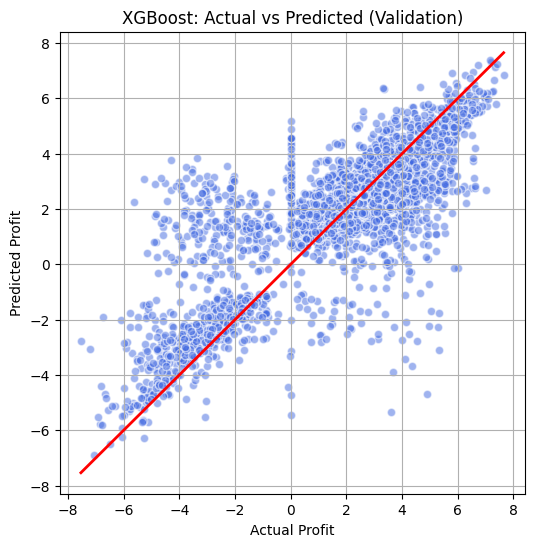

Correlation between actual and predicted: 0.8206


In [40]:
#Actual vs Predicted plot:
y_val_pred = best["model"].predict(X_val)

# Scatter plot
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_pred, alpha=0.5, color='royalblue', edgecolor='white')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("XGBoost: Actual vs Predicted (Validation)")
plt.grid(True)
plt.show()

#correlation between actual & predicted
corr = np.corrcoef(y_val, y_val_pred)[0,1]
print(f"Correlation between actual and predicted: {corr:.4f}")

# Feature Importance Plot

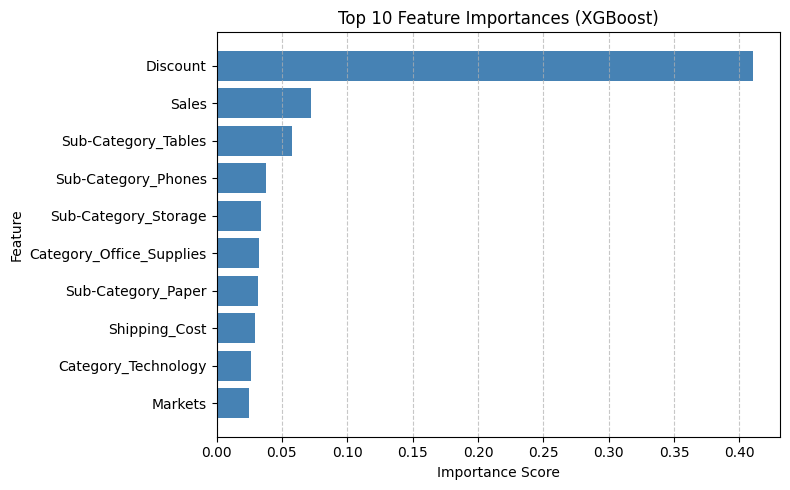

In [41]:
# Get feature importances from the best model
importances = best["model"].feature_importances_
features = X_train.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
top_importances = importances[indices[:top_n]]

# Plot
plt.figure(figsize=(8,5))
plt.barh(top_features[::-1], top_importances[::-1], color='steelblue')
plt.title("Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evaluate on Test:

In [48]:
# XGBoost model on test
final_model = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    objective="reg:squarederror"
)

# Train on combined train + validation for better learning:

X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])
final_model.fit(X_train_full, y_train_full)

# Evaluate on test set
y_test_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Final Model XGBoost")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Final Model XGBoost
Test RMSE: 1.6138
Test R²: 0.6759


# MLP Regressor (Neural Network):

In [44]:
from sklearn.neural_network import MLPRegressor

# define some configs to try
configs = [
    (64, 32),
    (128, 64),
    (64, 64, 32)
]

best = {"name": None, "val_r2": -np.inf, "model": None}

for layers in configs:
    model = MLPRegressor(
        hidden_layer_sizes=layers,
        activation='relu',
        solver='adam',
        learning_rate_init=0.01,
        max_iter=300,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_tr = model.predict(X_train)
    y_va = model.predict(X_val)

    tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
    va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
    tr_r2 = r2_score(y_train, y_tr)
    va_r2 = r2_score(y_val, y_va)

    name = f"layers={layers}"
    print(f"{name:20s} :::: Train R²: {tr_r2:.4f} :::: Val R²: {va_r2:.4f} :::: "
          f"Train RMSE: {tr_rmse:.4f} :::: Val RMSE: {va_rmse:.4f}")

    if va_r2 > best["val_r2"]:
        best = {"name": name, "val_r2": va_r2, "model": model}

print("\nBest on validation:", best["name"], ":::: Val R²:", f"{best['val_r2']:.4f}")

layers=(64, 32)      :::: Train R²: 0.7814 :::: Val R²: 0.5880 :::: Train RMSE: 1.3262 :::: Val RMSE: 1.7898
layers=(128, 64)     :::: Train R²: 0.8109 :::: Val R²: 0.5683 :::: Train RMSE: 1.2337 :::: Val RMSE: 1.8322
layers=(64, 64, 32)  :::: Train R²: 0.7586 :::: Val R²: 0.5742 :::: Train RMSE: 1.3938 :::: Val RMSE: 1.8195

Best on validation: layers=(64, 32) :::: Val R²: 0.5880


Strong training fit but weaker validation → clear overfitting.

Best at layers=(64, 32) with R²≈0.59, lower than tree-based models.

Deeper or wider architectures didn’t improve performance; slight degradation observed.

# Stacking Regressor (mix models):

In [46]:
from sklearn.ensemble import StackingRegressor

base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=9, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=7, learning_rate=0.05, random_state=42)),
    ('lr', LinearRegression())
]

# meta model
meta_model = Ridge(alpha=1.0)

# build stacking model
stack_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

# train
stack_model.fit(X_train, y_train)

# predict
y_tr = stack_model.predict(X_train)
y_va = stack_model.predict(X_val)

# evaluate
tr_rmse = np.sqrt(mean_squared_error(y_train, y_tr))
va_rmse = np.sqrt(mean_squared_error(y_val, y_va))
tr_r2 = r2_score(y_train, y_tr)
va_r2 = r2_score(y_val, y_va)

print(f"Train RMSE: {tr_rmse:.4f}, R²: {tr_r2:.4f}")
print(f"Validation RMSE: {va_rmse:.4f}, R²: {va_r2:.4f}")

Train RMSE: 1.4476, R²: 0.7396
Validation RMSE: 1.5898, R²: 0.6750


Ensemble blending improved overall accuracy compared to single models (R²≈0.68).

Training–validation gap small → stable and generalizable.

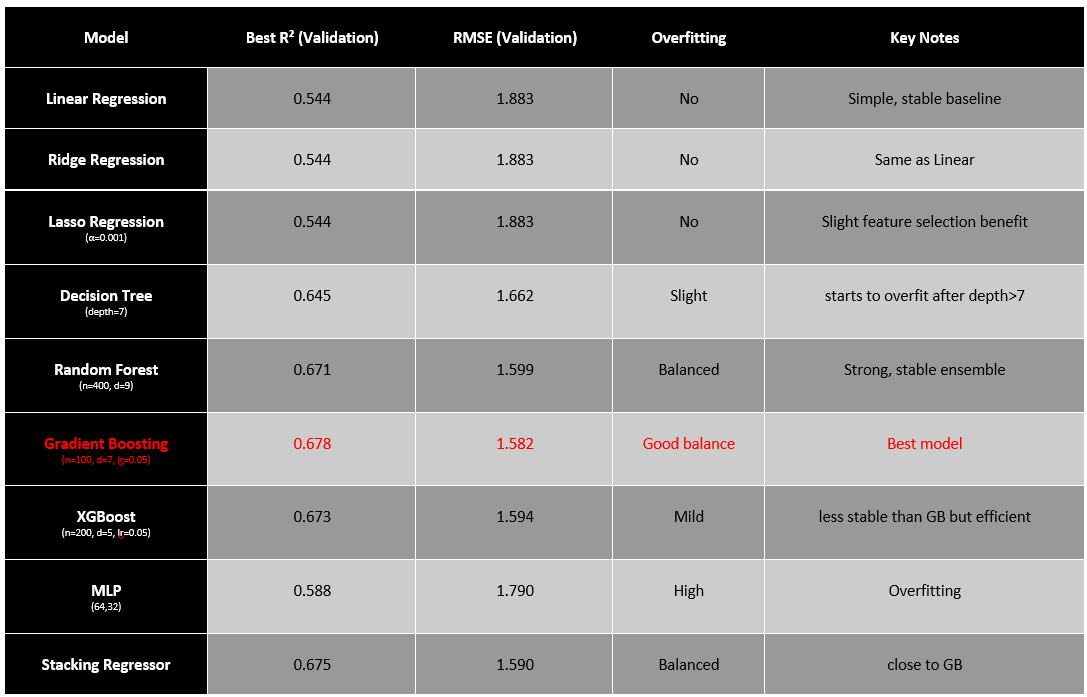

In [50]:
from IPython.display import Image, display
display(Image(filename="C:/Users/Z E Y T O N/Desktop/New folder/comparison.png"))